In [3]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model


In [6]:
cnn = tf.keras.models.load_model('trained_model.h5')


# Visualising and Performing Prediction on Single image


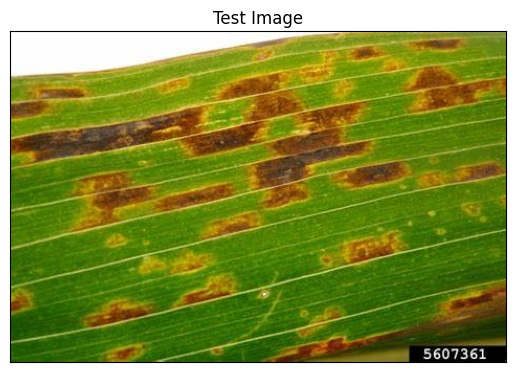

In [7]:
#Test Image Visualization
import cv2
import matplotlib.pyplot as plt

image_path = 'test/test/temp_cornmaize_cercospora.JPEG'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model


In [8]:

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 355ms/step


In [9]:
print(predictions)


[[1.1118257e-05 1.4662635e-01 5.9274862e-06 7.5543886e-07 2.1829494e-06
  2.0041158e-08 2.3583757e-06 1.0611235e-04 1.4985990e-04 6.2763451e-05
  1.3936230e-07 2.4708705e-02 1.9076876e-01 2.3033576e-04 9.8965700e-07
  3.1652746e-08 9.6467382e-04 1.3425151e-07 6.1483583e-03 3.0754359e-06
  5.0381375e-05 4.5384914e-09 8.3623172e-06 5.4912874e-07 7.3488515e-08
  6.3653408e-07 6.2835985e-01 2.3786802e-06 7.5241047e-07 1.2848267e-04
  1.6473354e-03 9.6390401e-08 7.1954496e-06 3.1664720e-07 1.2534662e-07
  7.5332940e-07 2.8185669e-09 9.1738258e-08]]


In [10]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

26


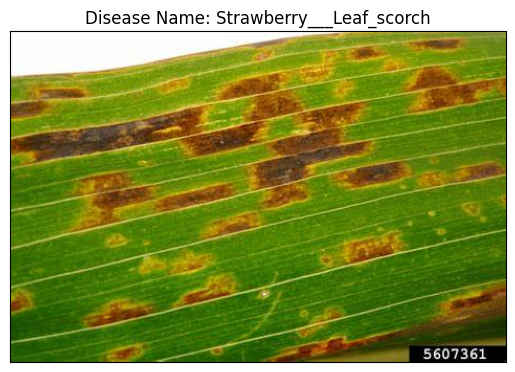

In [11]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()